In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from glob import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

import json
import cv2


In [4]:
ROOT_DIR = '/scratche/users/sansiddh/DeepLesion/'
IMG_DIR = ROOT_DIR+'Images_png/'

In [5]:
images = glob(IMG_DIR+'*/*')
len(images)


928020

In [6]:
len(glob(f'{IMG_DIR}/*'))


14601

In [7]:
df_metadata = pd.read_csv(ROOT_DIR+'DL_info.csv')


In [8]:
df_metadata


,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
0,000001_01_01_109.png,1,1,1,109,"233.537, 95.0204, 234.057, 106.977, 231.169, 1...","226.169, 90.0204, 241.252, 111.977","11.9677, 5.10387","0.44666, 0.283794, 0.434454",3,0,"103, 115","0.488281, 0.488281, 5","512, 512","-175, 275",F,62.0,3
1,000001_02_01_014.png,1,2,1,14,"224.826, 289.296, 224.016, 305.294, 222.396, 2...","217.396, 284.296, 233.978, 310.294","16.019, 6.61971","0.431015, 0.485238, 0.340745",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
2,000001_02_01_017.png,1,2,1,17,"272.323, 320.763, 246.522, 263.371, 234.412, 3...","229.412, 258.371, 285.221, 325.763","62.9245, 48.9929","0.492691, 0.503106, 0.351754",3,0,"8, 23","0.314453, 0.314453, 5","512, 512","-175, 275",F,72.0,3
3,000001_03_01_088.png,1,3,1,88,"257.759, 157.618, 260.018, 133.524, 251.735, 1...","246.735, 128.524, 270.288, 162.618","24.1998, 13.6123","0.498999, 0.278924, 0.452792",3,0,"58, 118","0.732422, 0.732422, 1","512, 512","-175, 275",F,73.0,3
4,000001_04_01_017.png,1,4,1,17,"304.019, 230.585, 292.217, 211.789, 304.456, 2...","287.217, 206.789, 309.456, 235.585","22.1937, 9.8065","0.572678, 0.42336, 0.445674",3,0,"11, 23","0.666016, 0.666016, 5","512, 512","-175, 275",F,73.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,004458_01_01_059.png,4458,1,1,59,"395.737, 284.142, 385.026, 310.221, 402.198, 3...","376.707, 279.142, 407.198, 315.221","28.1937, 22.1522","0.862386, 0.522347, 0.623233",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1
32731,004458_01_01_049.png,4458,1,1,49,"411.677, 296.13, 380.941, 321.278, 404.527, 32...","375.941, 291.13, 416.677, 328.028","39.7138, 30.688","0.845748, 0.557232, 0.570726",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1
32732,004458_01_01_047.png,4458,1,1,47,"204.055, 307.341, 170.022, 316.047, 180.311, 3...","165.022, 297.592, 209.055, 329.357","35.1289, 22.4662","0.339313, 0.588705, 0.56127",-1,0,"40, 85","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1
32733,004458_01_01_102.png,4458,1,1,102,"276.457, 361.216, 220.572, 354.23, 247.117, 35...","215.572, 347.367, 281.457, 373.201","56.3199, 15.9573","0.477197, 0.730823, 0.813426",-1,0,"96, 108","0.857422, 0.857422, 5","512, 512","-175, 275",F,66.0,1


In [9]:
columns = ['Measurement_coordinates', 'Bounding_boxes', 'Lesion_diameters_Pixel_', 'Normalized_lesion_location', 
           'Slice_range', 'Spacing_mm_px_', 'Image_size', 'DICOM_windows']
for colname in columns:
    df_metadata[colname] = df_metadata[colname].apply(lambda x : list(map(float, x.split(', '))))


In [10]:
df_temp = df_metadata.groupby(['Patient_index', 'Study_index', 'Series_ID']).count()
df_temp[(df_temp > 5)['File_name']].sort_values('File_name', ascending=False)


File_name  Key_slice_index  \
Patient_index Study_index Series_ID                               
3463          1           1                 23               23   
1143          8           2                 21               21   
2885          1           1                 21               21   
1994          1           1                 19               19   
1487          5           2                 18               18   
...                                        ...              ...   
1137          1           1                  6                6   
1143          3           1                  6                6   
              8           3                  6                6   
1144          1           1                  6                6   
1841          1           2                  6                6   

                                     Measurement_coordinates  Bounding_boxes  \
Patient_index Study_index Series_ID                                            
3463          1           1                               23              23   
1143          8           2                               21              21   
2885          1           1                               21              21   
1994          1           1                               19              19   
1487          5           2                               18              18   
...                                                      ...             ...   
1137          1           1                                6               6   
1143          3           1                                6               6   
              8           3                                6               6   
1144          1           1                                6               6   
1841          1           2                                6               6   

                                     Lesion_diameters_Pixel_  \
Patient_index Study_index Series_ID                            
3463          1           1                               23   
1143          8           2                               21   
2885          1           1                               21   
1994          1           1                               19   
1487          5           2                               18   
...                                                      ...   
1137          1           1                                6   
1143          3           1                                6   
              8           3                                6   
1144          1           1                                6   
1841          1           2                                6   

                                     Normalized_lesion_location  \
Patient_index Study_index Series_ID                               
3463          1           1                                  23   
1143          8           2                                  21   
2885          1           1                                  21   
1994          1           1                                  19   
1487          5           2                                  18   
...                                                         ...   
1137          1           1                                   6   
1143          3           1                                   6   
              8           3                                   6   
1144          1           1                                   6   
1841          1           2                                   6   

                                     Coarse_lesion_type  Possibly_noisy  \
Patient_index Study_index Series_ID                                       
3463          1           1                          23              23   
1143          8           2                          21              21   
2885          1           1                          21              21   
1994          1           1                 

In [11]:
df_metadata.groupby('Coarse_lesion_type').count()


,File_name,Patient_index,Study_index,Series_ID,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
Coarse_lesion_type,,,,,,,,,,,,,,,,,
-1,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919,22919
1,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
2,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176,2176
3,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672,1672
4,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284,1284
5,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394,2394
6,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495,495
7,681,681,681,681,681,681,681,681,681,681,681,681,681,681,681,680,681
8,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867,867


In [12]:
df_temp = df_metadata.groupby(['Patient_index', 'Study_index', 'Series_ID']).count()
df_temp = df_temp.reset_index()
# (Here each row in the dataframe denotes 1 CT scanning procedure, note that 1 study can have multiple procedures (multiple contrasts))
# And the count in each row is total number of IDENTIFIED lesions in that procedure
# Total number of CT scanning procedures (14601)
df_temp2 = df_temp.groupby(['Patient_index', 'Study_index']).count()
df_temp2 = df_temp2.sort_values('File_name', ascending=True)
# df_temp2 is the total number of CT scanning studies (10594).
df_temp2
df_temp2[(df_temp2 > 2)['File_name']].sort_values('File_name', ascending=False)
# There are a total of 574 studies with multiple CT scanning procedures


,,Series_ID,File_name,Key_slice_index,Measurement_coordinates,Bounding_boxes,Lesion_diameters_Pixel_,Normalized_lesion_location,Coarse_lesion_type,Possibly_noisy,Slice_range,Spacing_mm_px_,Image_size,DICOM_windows,Patient_gender,Patient_age,Train_Val_Test
Patient_index,Study_index,,,,,,,,,,,,,,,,
3446,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
1170,8,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3624,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
3120,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2707,1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2999,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2139,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [13]:
with open(ROOT_DIR+'text_mined_labels_171_and_split.json', 'r') as f:
    labels_json = json.load(f)


In [14]:
labels_json.keys()


dict_keys(['val_uncertain_labels', 'test_uncertain_labels', 'test_lesion_idxs', 'train_irrelevant_labels', 'val_relevant_labels', 'train_lesion_idxs', 'val_lesion_idxs', 'term_list', 'train_relevant_labels', 'train_uncertain_labels', 'test_relevant_labels'])

In [27]:
np.sort(labels_json['val_lesion_idxs'])
full_array = []
full_array += labels_json['val_relevant_labels']
full_array += labels_json['test_relevant_labels']
full_array += labels_json['train_relevant_labels']

subset_array = []
for labels in full_array:
    labels_list = [labels_json['term_list'][x] for x in labels]
    if 'pancreas' in labels_list:
        subset_array.append(labels_list)
        print(labels_list)


['mass', 'pancreatic tail', 'abdomen', 'retroperitoneum', 'pancreas']
['hyperattenuation', 'mass', 'pancreas', 'abdomen', 'retroperitoneum', 'upper abdomen']
['hypoattenuation', 'mass', 'pancreas', 'abdomen', 'retroperitoneum', 'upper abdomen']
['hypoattenuation', 'pancreatic body', 'abdomen', 'retroperitoneum', 'pancreas']
['hyperattenuation', 'pancreatic tail', 'abdomen', 'retroperitoneum', 'pancreas']
['hypoattenuation', 'pancreatic tail', 'abdomen', 'retroperitoneum', 'pancreas']
['hyperattenuation', 'pancreatic tail', 'abdomen', 'retroperitoneum', 'pancreas']
['enhancing', 'pancreatic tail', 'abdomen', 'retroperitoneum', 'pancreas']
['enhancing', 'pancreatic tail', 'abdomen', 'retroperitoneum', 'pancreas']
['hypoattenuation', 'pancreatic body', 'abdomen', 'retroperitoneum', 'pancreas']
['mass', 'pancreas', 'abdomen', 'retroperitoneum', 'upper abdomen']
['cyst', 'pancreatic body', 'abdomen', 'retroperitoneum', 'pancreas']
['hypoattenuation', 'mass', 'pancreas', 'abdomen', 'retroper

In [16]:
len(labels_json['val_relevant_labels'])


1976

In [17]:
idx_arr = []
idx_arr.extend(labels_json['train_lesion_idxs'])
idx_arr.extend(labels_json['val_lesion_idxs'])
idx_arr.extend(labels_json['test_lesion_idxs'])
len(idx_arr)


24121

In [18]:
len(labels_json['train_lesion_idxs'])


20266

In [19]:
len(labels_json['train_relevant_labels'])


20266

In [20]:
len(labels_json['train_irrelevant_labels'])


20266

In [21]:
len(labels_json['train_uncertain_labels'])


20266

# Visualise the images

[-3024 -1001 -1000 ...  1141  1188  1202]
[[-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 ...
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]
 [-3024 -3024 -3024 ... -3024 -3024 -3024]]
[-175 -174 -173 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162
 -161 -160 -159 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148
 -147 -146 -145 -144 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134
 -133 -132 -131 -130 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120
 -119 -118 -117 -116 -115 -114 -113 -112 -111 -110 -109 -108 -107 -106
 -105 -104 -103 -102 -101 -100  -99  -98  -97  -96  -95  -94  -93  -92
  -91  -90  -89  -88  -87  -86  -85  -84  -83  -82  -81  -80  -79  -78
  -77  -76  -75  -74  -73  -72  -71  -70  -69  -68  -67  -66  -65  -64
  -63  -62  -61  -60  -59  -58  -57  -56  -55  -54  -53  -52  -51  -50
  -49  -48  -47  -46  -45  -44  -43  -42  -41  -40  -39

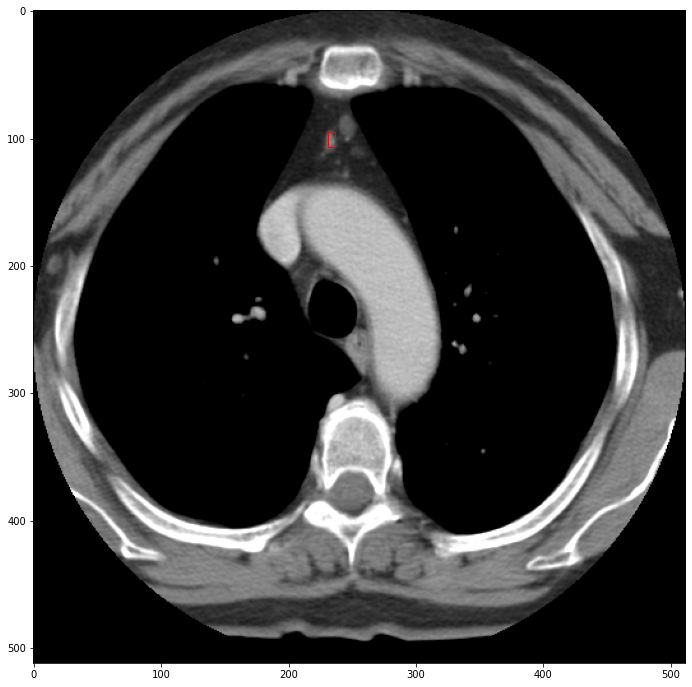

In [22]:
img = cv2.imread(f'{IMG_DIR}/000001_01_01/109.png', cv2.IMREAD_UNCHANGED)

img = img.astype('int32')
img = img - 32768
print(np.unique(img))
print(img)

min_hu, max_hu = (-175, 275)
img[img > max_hu] = max_hu
img[img < min_hu] = min_hu
print(np.unique(img))
img =  (img - min_hu)/(max_hu - min_hu)
img_pr = img

bboxes = df_metadata.loc[0, 'Bounding_boxes']
bboxes[0] += 5
bboxes[1] += 5
bboxes[2] -= 5
bboxes[3] -= 5
rect = patches.Rectangle((bboxes[0], bboxes[1]),
                         bboxes[2] - bboxes[0], bboxes[3] - bboxes[1],
                         linewidth=1, edgecolor='r', facecolor='none')

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img, cmap='gray')
ax.add_patch(rect)



In [23]:
img = plt.imread(f'{IMG_DIR}/000001_01_01/110.png')
img - img_pr

array([[0.45386434, 0.45386434, 0.45386434, ..., 0.45386434, 0.45386434,
        0.45386434],
       [0.45386434, 0.45386434, 0.45386434, ..., 0.45386434, 0.45386434,
        0.45386434],
       [0.45386434, 0.45386434, 0.45386434, ..., 0.45386434, 0.45386434,
        0.45386434],
       ...,
       [0.45386434, 0.45386434, 0.45386434, ..., 0.45386434, 0.45386434,
        0.45386434],
       [0.45386434, 0.45386434, 0.45386434, ..., 0.45386434, 0.45386434,
        0.45386434],
       [0.45386434, 0.45386434, 0.45386434, ..., 0.45386434, 0.45386434,
        0.45386434]])

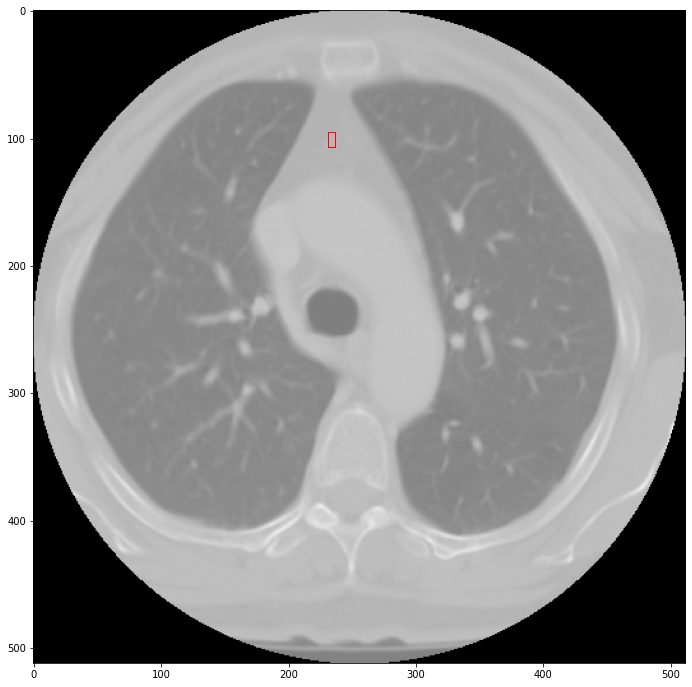

In [24]:
img = plt.imread(f'{IMG_DIR}/000001_01_01/110.png')

bboxes = df_metadata.loc[0, 'Bounding_boxes']
rect = patches.Rectangle((bboxes[0], bboxes[1]),
                         bboxes[2] - bboxes[0], bboxes[3] - bboxes[1], 
                         linewidth=1, edgecolor='r', facecolor='none')

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img, cmap='gray')
ax.add_patch(rect)



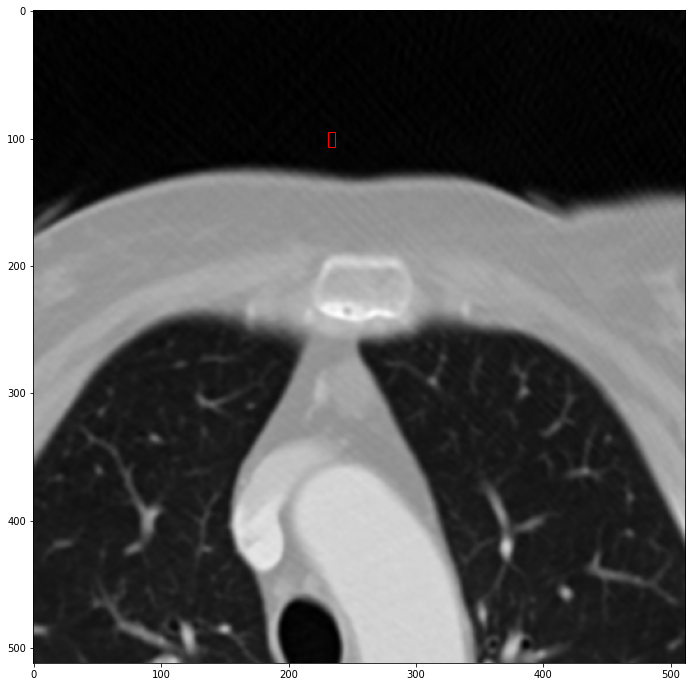

In [25]:
img = plt.imread(f'{IMG_DIR}/000001_02_01/014.png')
bboxes = df_metadata.loc[0, 'Bounding_boxes']
rect = patches.Rectangle((bboxes[0], bboxes[1]),
                         bboxes[2] - bboxes[0], bboxes[3] - bboxes[1], 
                         linewidth=1, edgecolor='r', facecolor='none')

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(img, cmap='gray')
ax.add_patch(rect)
